In [2]:
import os, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
patches_csv_path = "/mnt/SSDData/pdata/processed/patches_clean90_512.csv"

In [4]:
df = pd.read_csv(patches_csv_path)

In [5]:
df.shape[0] / 10000

164.8199

In [6]:
df.groupby('data_provider').count()

,image_id,isup_grade,gleason_score,y,x,label0,label1,label2,label3,label4,label5
data_provider,,,,,,,,,,,
karolinska,940304,940304,940304,940304,940304,940304,940304,940304,940304,940304,940304
radboud,707895,707895,707895,707895,707895,707895,707895,707895,707895,707895,707895


In [7]:
df[df['data_provider'] == 'karolinska'].groupby('isup_grade').count()

,image_id,data_provider,gleason_score,y,x,label0,label1,label2,label3,label4,label5
isup_grade,,,,,,,,,,,
0,332119,332119,332119,332119,332119,332119,332119,332119,332119,332119,332119
1,308811,308811,308811,308811,308811,308811,308811,308811,308811,308811,308811
2,116365,116365,116365,116365,116365,116365,116365,116365,116365,116365,116365
3,53931,53931,53931,53931,53931,53931,53931,53931,53931,53931,53931
4,81490,81490,81490,81490,81490,81490,81490,81490,81490,81490,81490
5,47588,47588,47588,47588,47588,47588,47588,47588,47588,47588,47588


In [8]:
df[df['data_provider'] == 'radboud'].groupby('isup_grade').count()

,image_id,data_provider,gleason_score,y,x,label0,label1,label2,label3,label4,label5
isup_grade,,,,,,,,,,,
0,116305,116305,116305,116305,116305,116305,116305,116305,116305,116305,116305
1,111611,111611,111611,111611,111611,111611,111611,111611,111611,111611,111611
2,101613,101613,101613,101613,101613,101613,101613,101613,101613,101613,101613
3,131533,131533,131533,131533,131533,131533,131533,131533,131533,131533,131533
4,100912,100912,100912,100912,100912,100912,100912,100912,100912,100912,100912
5,145921,145921,145921,145921,145921,145921,145921,145921,145921,145921,145921


In [9]:
df[df['data_provider'] == 'karolinska']['label0'].sum()

376603.5518569946

In [10]:
df[df['data_provider'] == 'karolinska']['label1'].sum()

414717.4648094177

In [11]:
df[df['data_provider'] == 'karolinska']['label2'].sum()

148982.98333358765

In [12]:
df[df['data_provider'] == 'karolinska']['label3'].sum()

0.0

In [13]:
df[df['data_provider'] == 'karolinska'].groupby('isup_grade')[[f'label{i}' for i in range(6)]].sum()

,label0,label1,label2,label3,label4,label5
isup_grade,,,,,,
0,100827.761032,231291.238968,0.000000,0.0,0.0,0.0
1,146036.662758,114599.573204,48174.764038,0.0,0.0,0.0
2,53382.259941,30790.589436,32192.150623,0.0,0.0,0.0
3,23289.912422,10860.653229,19780.434349,0.0,0.0,0.0
4,34006.551952,20293.183430,27190.264618,0.0,0.0,0.0
5,19060.403751,6882.226543,21645.369705,0.0,0.0,0.0


In [14]:
df[df['data_provider'] == 'radboud'].groupby('isup_grade')[[f'label{i}' for i in range(6)]].sum()

,label0,label1,label2,label3,label4,label5
isup_grade,,,,,,
0,25338.921829,80807.616409,10158.461761,0.000000,0.000000,0.000000
1,25062.729248,71804.746231,4955.885300,9787.639221,0.000000,0.000000
2,20757.194534,62841.656006,2691.481110,10421.675323,4900.993027,0.000000
3,25453.434586,82540.506454,3664.549454,5159.451752,14715.057755,0.000000
4,20807.945801,64780.446457,2532.393570,958.796906,10659.891571,1172.525696
5,29142.772827,94434.986130,2371.470520,0.000000,12832.275238,7139.495285


In [15]:
df_all_g = df.groupby('image_id')
df_k_g = df[df['data_provider'] == 'karolinska'].groupby('image_id')
df_r_g = df[df['data_provider'] == 'radboud'].groupby('image_id')

In [16]:
dfs_g = [df_all_g, df_k_g, df_r_g]

In [17]:
patches_per_id = [df_g.count()['data_provider'].values for df_g in dfs_g]

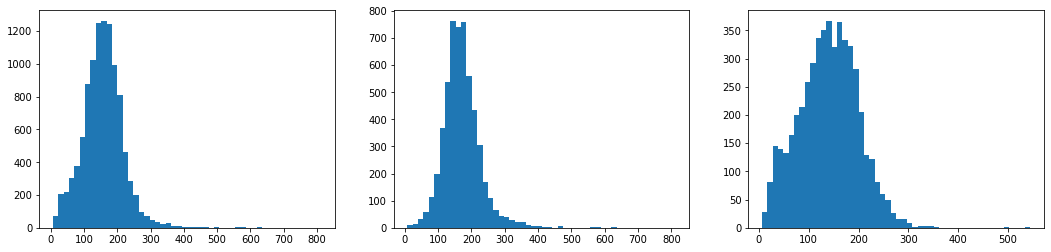

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
for n in range(3):
    axs[n].hist(patches_per_id[n], bins=50);

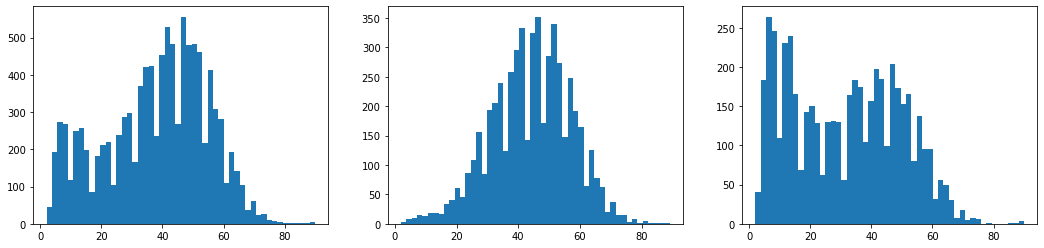

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
for n in range(3):
    min_y_x = dfs_g[n].min()[['y', 'x']].values
    max_y_x = dfs_g[n].max()[['y', 'x']].values

    size_y_x = max_y_x - min_y_x

    axs[n].hist(size_y_x[:, 0], bins=50);

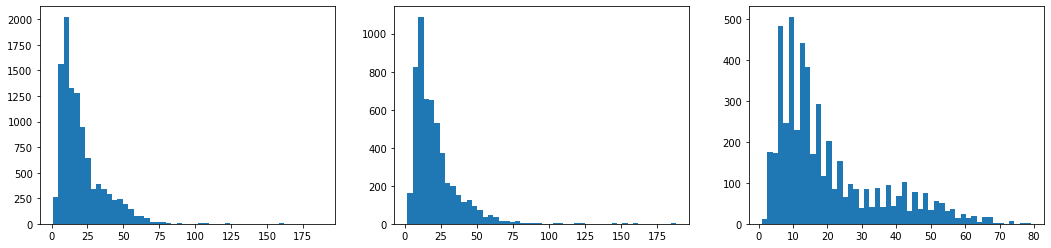

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
for n in range(3):
    min_y_x = dfs_g[n].min()[['y', 'x']].values
    max_y_x = dfs_g[n].max()[['y', 'x']].values

    size_y_x = max_y_x - min_y_x

    axs[n].hist(size_y_x[:, 1], bins=50);